# Projekt 1 
### P. Fijałkowski, M. Krzyziński, T. Nocoń

## Eksploracja danych

#### Wczytanie pakietów

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#### Wstępne informacje i wczytanie danych
W projekcie będziemy pracować nad zbiorem danym *Census income* zawierającym informacje pochodzące ze spisu ludności Amerykanów. Celem zadania będzie klasyfikacja, czy zarobki danej osoby przekroczą próg 50 tys. $ rocznie. 

Informacje dotyczące zbioru, jak i same dane możemy znaleźć na [stronie](https://www.apispreadsheets.com/datasets/106).

In [164]:
df = pd.read_csv("https://lovespreadsheet-tutorials.s3.amazonaws.com/APIDatasets/census_income_dataset.csv")
attr = pd.read_csv("attributes_census_income.csv")

In [165]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419.0,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
48838,64,?,321403.0,HS-grad,9,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K
48839,38,Private,374983.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
48840,44,Private,83891.0,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K


In [166]:
with pd.option_context('display.max_colwidth', 400):
    display(attr)

,name,type,description
0,age,integer,age of individual
1,workclass,string,"Values: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked"
2,fnlwgt,float,Final sampling weight. Inverse of sampling fraction adjusted for non-response and over or under sampling of particular groups
3,education,string,"Values: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool"
4,education_num,integer,NaN
5,marital_status,string,"Values: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse"
6,occupation,string,"Values: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces"
7,relationship,string,"Values: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried"
8,race,string,"Values: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black"
9,sex,string,"Values: Female, Male"


Większość zmiennych ma samotłumaczące się nazwy, natomiast dość kłopotliwa wydaje się `fnlwgt` - jest to final sampling weight. Poszczególne rekordy mają przypisaną odpowiednią wagę, aby odzwierciedlać populację. Jest to więc statystyczny parametr, który nie będzie przydatny w tworzeniu modelu predykcji, ani w dalszej analizie, w związku z czym usuniemy tę kolumnę.

In [167]:
df.drop("fnlwgt", axis=1, inplace=True)

In [168]:
df.shape

(48842, 14)

Już na wstępie możemy zauważyć, że mamy 15 kolumn, spośród których jedna będzie targetem - `income_level` zawierająca informacje odnośnie przekroczenia lub nieprzekroczenia progu zarobkowego 50 tys. dolarów.

Ponadto nawet wyświetlając ramkę widzimy w niektórych kolumnach znaki zapytania `?`. Również na stronie, z której pobieramy zbiór znajdziemy informacje, że brakujące wartości zostały wypełnione znakami zapytania `?` bądź wartością `-100000`. Będziemy musieli się uporać zatem z problemem brakujących danych. Ale sprawdźmy dla zasady, czy może niektóre wartości w ramce rzeczywiście pozostały `NULL`ami...

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  int64  
 1   workclass       48842 non-null  object 
 2   education       48842 non-null  object 
 3   education_num   48842 non-null  int64  
 4   marital_status  48842 non-null  object 
 5   occupation      48842 non-null  object 
 6   relationship    48842 non-null  object 
 7   race            48842 non-null  object 
 8   sex             48842 non-null  object 
 9   capital_gain    48842 non-null  float64
 10  capital_loss    48842 non-null  float64
 11  hours_per_week  48842 non-null  float64
 12  native_country  48842 non-null  object 
 13  income_level    48842 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 5.2+ MB


Okazuje się, że nie. Zatem rzeczywiście wszystkie ewentualne brakujące wartości zostały zastąpione w określony wyżej sposób. 

Przy okazji widzimy również, jakiego typu są nasze kolumny. 

Sprawdźmy teraz, jak dużo mamy braków w rzeczywistości (tych zatuszowanych). 

In [170]:
print(f'{df[(df == "?").any(axis = 1)].shape[0]} wierszy, w których występuje brak danych zastąpiony `?`')

3620 wierszy, w których występuje brak danych zastąpiony `?`


In [171]:
print(f'{df[(df == -100000).any(axis = 1)].shape[0]} wierszy, w których występuje brak danych zastąpiony `-100000`')

0 wierszy, w których występuje brak danych zastąpiony `-100000`


Mamy 3620 wierszy z brakiem danych. W poleceniu projektowym znajduje się informacja, że zalecane jest ograniczenie liczby rekordów, w związku z czym są one kandydatem do usunięcia ze zbioru przed modelowaniem. Na czas analizy zastąpimy te wartości NaNami. 

In [172]:
df[df == "?"] = np.nan

In [173]:
df.isna().sum()

age                  0
workclass         2799
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income_level         0
dtype: int64

Widzimy, w których kolumnach występują braki danych. Przy czym możemy zbadać, że dla rekordów, gdzie mamy brak danych dotyczący klasy roboczej nie ma również informacji o zawodzie, co wydaje się naturalne. 

In [174]:
df[df["workclass"].isna() & df["occupation"].isna()]

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
27,54,NaN,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0.0,0.0,60.0,South,>50K
61,32,NaN,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0.0,0.0,40.0,NaN,<=50K
69,25,NaN,Some-college,10,Never-married,NaN,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
77,67,NaN,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0.0,0.0,2.0,United-States,<=50K
106,17,NaN,10th,6,Never-married,NaN,Own-child,White,Female,34095.0,0.0,32.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48682,61,NaN,Some-college,10,Married-civ-spouse,NaN,Husband,White,Male,0.0,0.0,14.0,United-States,<=50K
48769,21,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
48800,73,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0.0,0.0,25.0,Canada,<=50K
48812,81,NaN,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,2936.0,0.0,20.0,United-States,<=50K


Zanim przejdziemy do wizualizacji, sprawdźmy parametry statystyczne naszych zmiennych numerycznych.

In [175]:
df.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


Już w tym momencie widzimy, że zmienne `capital_gain` i	`capital_loss` mogą okazać się problematyczne, ze względu na bardzo odstające obserwacje. Widzimy też, że minimalny wiek uwzględnionych w ramce osób to 17 lat, co zgadza się z opisem zbioru na stronie. 

Widzimy również zakres wartości zmiennej `education_num`. Okazuje się, że liczby te odpowiadają poszczególnym poziomom edukacji wyrażonym słownie w kolumnie `education`, w związku z tym w modelu należy wykorzystać tylko jedną zmienną (numeryczna daje nam w tym przypadku pożądaną hierarchizację poszczególnych szczebli edukacji). 

In [176]:
# kolumny education_num i education oznaczają to samo -
# dla każdej liczby w education_num jest tylko jedna wartość w education 
for i in range(1, max(df["education_num"])+1):
    print(i, df[df["education_num"] == i]["education"].unique())

1 ['Preschool']
2 ['1st-4th']
3 ['5th-6th']
4 ['7th-8th']
5 ['9th']
6 ['10th']
7 ['11th']
8 ['12th']
9 ['HS-grad']
10 ['Some-college']
11 ['Assoc-voc']
12 ['Assoc-acdm']
13 ['Bachelors']
14 ['Masters']
15 ['Prof-school']
16 ['Doctorate']


In [177]:
# stworzymy więc odpowiednią listę, która posłuży do skategoryzowania zmiennej i wprowadzenia porządku
education_list = []
for i, name in df.groupby(["education_num", "education"]).groups.keys():
    education_list += [name]

df["education"] = pd.Categorical(df["education"], 
                                categories=education_list, ordered=True)

### Histogramy

Mamy tylko 4 zmienne typowo numeryczne, które można przedstawić na histogramach. 

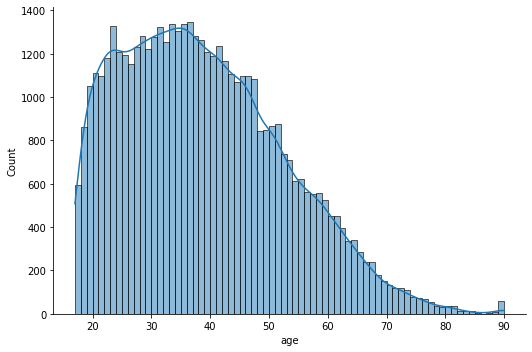

In [178]:
sns.displot(data = df, x = "age", binwidth = 1, aspect = 1.5, kde = True)
plt.show()

Widzimy, że rozkład wieku przypomina normalny. Oczywiście jest ucięty z lewej strony, gdyż dane są tylko dla osób powyżej 16 roku życia. Co ciekawe wydaje się, że wszystkim osobom w wieku 90+ został przypisany wiek 90 lat (dane zostały obcięte). 

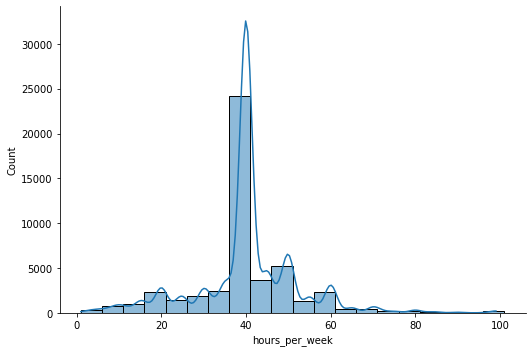

In [179]:
sns.displot(data = df, x = "hours_per_week", binwidth = 5, aspect = 1.5, kde = True)
plt.show()

Widzimy, że znaczna większość osób pracuje 40 godzin tygodniowo, ale są i takie, dla których dane podają około 100 godzin pracy.

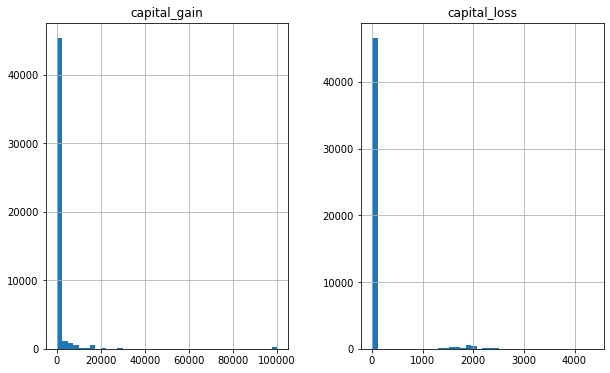

In [180]:
df[["capital_gain", "capital_loss"]].hist(bins = 40, figsize = (10, 6))
plt.show()

W przypadku zmiennych capital gain i loss widzimy, że są one zerowe dla większości rekordów i nie pomoże tu również ich zlogarytmowanie. Warto jednak sprawdzić, jak wyglądają ich rozkłady z pominięciem tych zerowych wartości. 

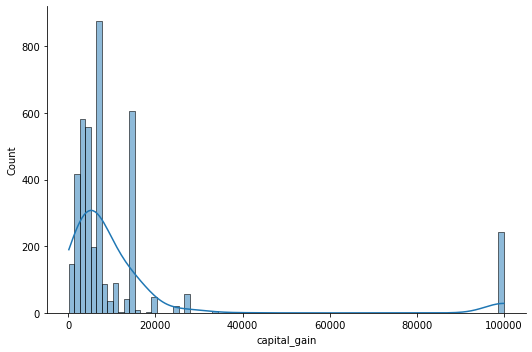

In [181]:
sns.displot(data = df[df["capital_gain"]>0], x = "capital_gain", aspect = 1.5, kde = True)
plt.show()

Okazuje się chociażby, że także wartości w kolumnie capital_gain zostały przycięte do 100000.

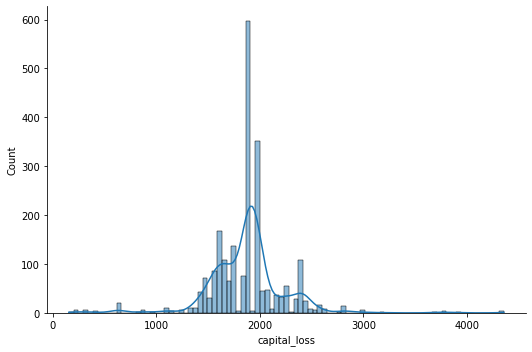

In [182]:
sns.displot(data = df[df["capital_loss"]>0], x = "capital_loss", aspect = 1.5, kde = True)
plt.show()

### Korelacje

Na czas sprawdzania korelacji zmapujemy informację o przekroczeniu progu zarobkowego na liczby. 

In [183]:
df[">50K"] = df.loc[:,"income_level"].map({'<=50K': 0, '>50K': 1})

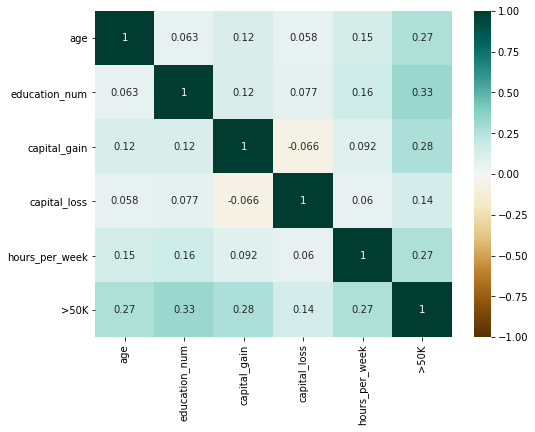

In [184]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(method = "spearman"), annot=True, vmin=-1, vmax=1, cmap="BrBG")
plt.show()

Widzimy korelacje naszej zmiennej wyjaśnianej z każdą pozostałą ujętą w macierzy. 

### Dalsza eksploracja danych

Zanim zaczniemy myśleć o bardziej skomplikowanych zależnościach, spójrzmy, ile mamy rekordów zaklasyfikowanych do poszczególnych grup.

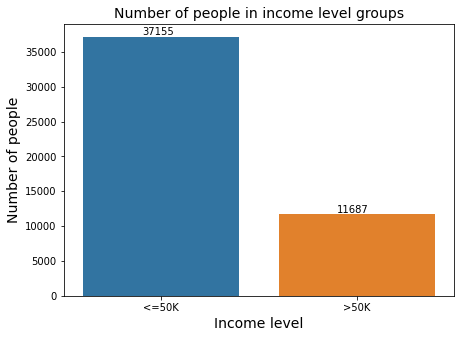

In [185]:
plt.figure(figsize = (7, 5))
ax = sns.countplot(data = df, x = "income_level", label="count")
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+250))
plt.title("Number of people in income level groups", fontsize=14)
plt.xlabel("Income level", fontsize=14)
plt.ylabel("Number of people", fontsize=14)
plt.show()

Teraz możemy zwrócić uwagę, jak różne zmienne (charakterystyki) wpływają na liczbę osób w obu grupach. Zaczniemy od zmiennych numerycznych. 

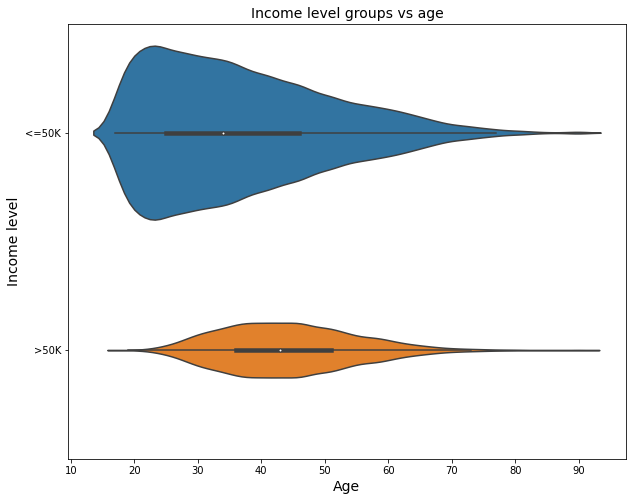

In [186]:
plt.figure(figsize = (10, 8))
sns.violinplot(data=df, y="income_level", x="age", scale = "count")
plt.title("Income level groups vs age", fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Income level", fontsize=14)
plt.show()

Widzimy, że to starsi osiągają większe dochody, a młodzi, w szczególności do 25 lat, zarabiają przeciętnie mniej. 

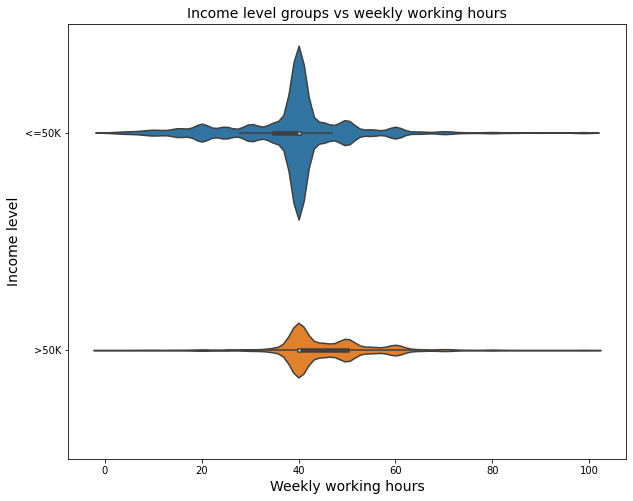

In [187]:
plt.figure(figsize = (10, 8))
sns.violinplot(data=df, y="income_level", x="hours_per_week", scale = "count")
plt.title("Income level groups vs weekly working hours", fontsize=14)
plt.xlabel("Weekly working hours", fontsize=14)
plt.ylabel("Income level", fontsize=14)
plt.show()

Widzimy, że w większości to Ci pracujący dłużej mogą osiągać częściej większe przychody (zarabiający więcej stanowią około 40% grupy osób, która pracuje ponad 40 godzin). 

In [199]:
df[df["hours_per_week"] > 40][">50K"].mean()

0.40008361204013376

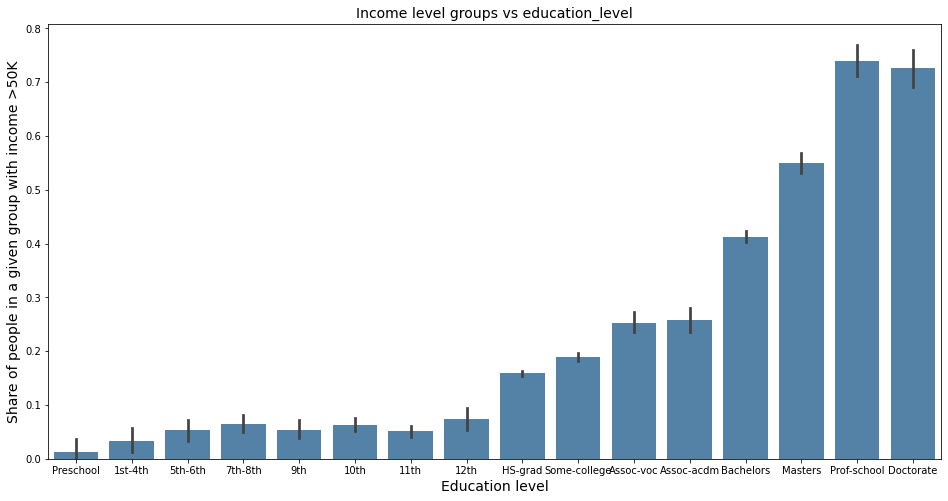

In [215]:
plt.figure(figsize = (16, 8))
sns.barplot(data = df, x = "education", y = ">50K", estimator=np.mean, color = "steelblue")
plt.title("Income level groups vs education_level", fontsize=14)
plt.xlabel("Education level", fontsize=14)
plt.ylabel("Share of people in a given group with income >50K", fontsize=14)
plt.show()

Widać, że poziom edukacji wpływa na wysokość przychodów - im wyższy, tym większa szansa na wysokie zarobki. 

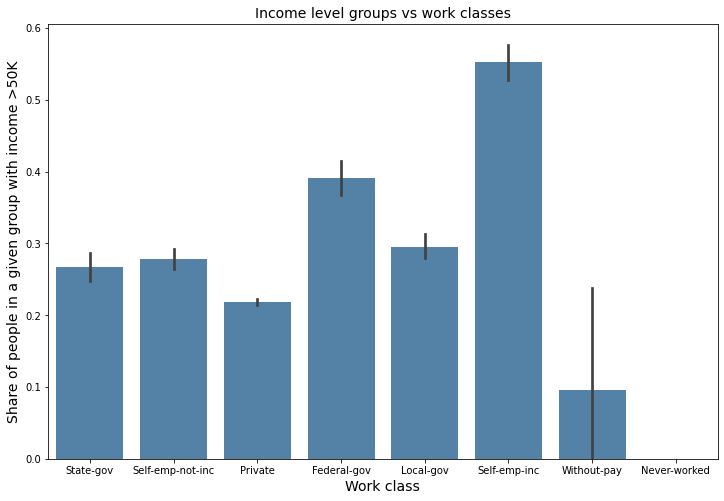

In [216]:
plt.figure(figsize = (12, 8))
sns.barplot(data = df, x = "workclass", y = ">50K", estimator=np.mean, color = "steelblue")
plt.title("Income level groups vs work classes", fontsize=14)
plt.xlabel("Work class", fontsize=14)
plt.ylabel("Share of people in a given group with income >50K", fontsize=14)
plt.show()

Widać, że osoby na samozatrudnieniu, prowadzące własną działalność najczęściej zarabiają ponad 50 tys. rocznie. Natomiast wartym uwagi jest fakt, że w sektorze prywatnym zatrudnienie stanowią oni mniejszy procent niż w pozostałych, publicznych klasach. 

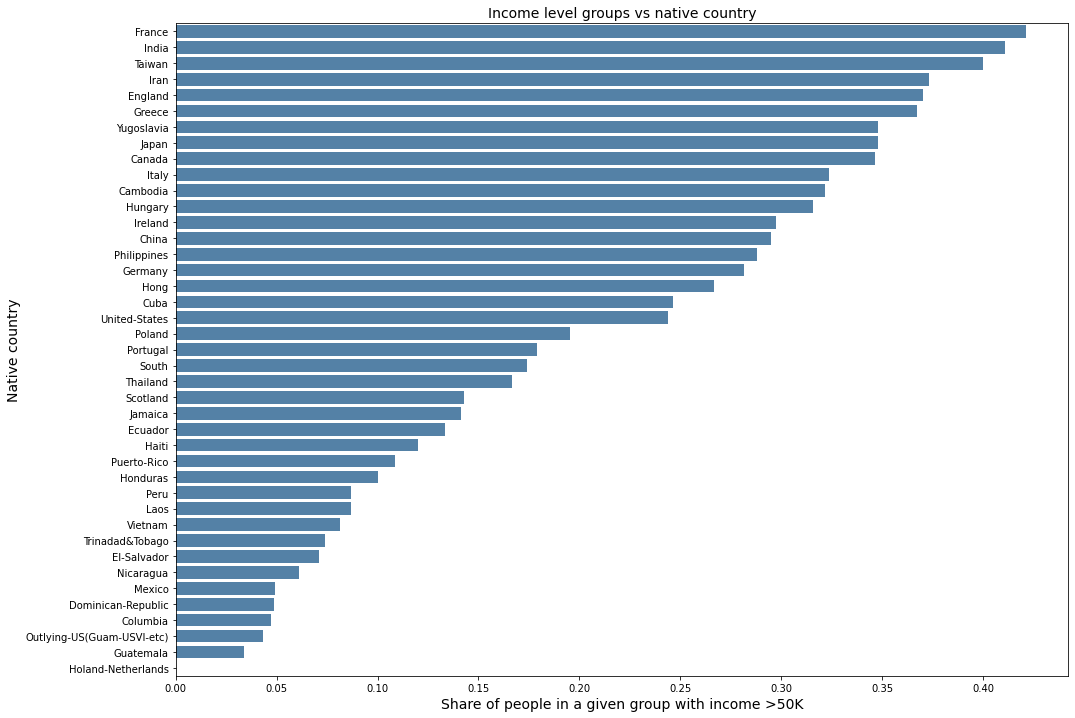

In [227]:
countries_plot_data = df.groupby("native_country")[">50K"].mean().sort_values(ascending = False).reset_index()
plt.figure(figsize = (16, 12))
sns.barplot(data = countries_plot_data, y = "native_country", x = ">50K", color = "steelblue")
plt.title("Income level groups vs native country", fontsize=14)
plt.ylabel("Native country", fontsize=14)
plt.xlabel("Share of people in a given group with income >50K", fontsize=14)
plt.show()

Zauważalny jest fakt, że państwa, z których emigranci rzadziej zarabiają powyżej 50 tys. to w większości grupa państw uznawanych za biedniejsze, rozwijające się. Gdybyśmy chcieli, by nasz model działał ogólnie, również dla osób narodowości innej niż te, o których dane mamy, moglibyśmy poszukać zależności ze współczynnikami rozwoju gospodarczego państw i dopasować odpowiednie kategorie. 

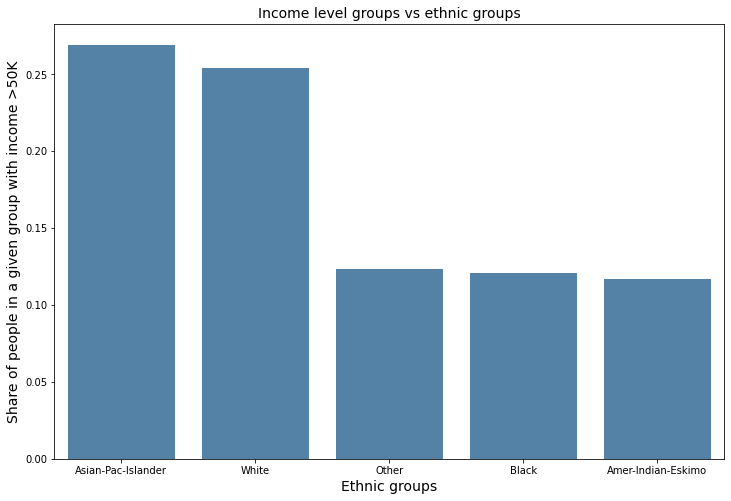

In [234]:
races_plot_data = df.groupby("race")[">50K"].mean().sort_values(ascending = False).reset_index()
plt.figure(figsize = (12, 8))
sns.barplot(data = races_plot_data, x = "race", y = ">50K", color = "steelblue")
plt.title("Income level groups vs ethnic groups", fontsize=14)
plt.xlabel("Ethnic groups", fontsize=14)
plt.ylabel("Share of people in a given group with income >50K", fontsize=14)
plt.show()

Niestety widać też znaczące różnice w kwestii zarobków w zależności od pochodzenia etnicznego. 

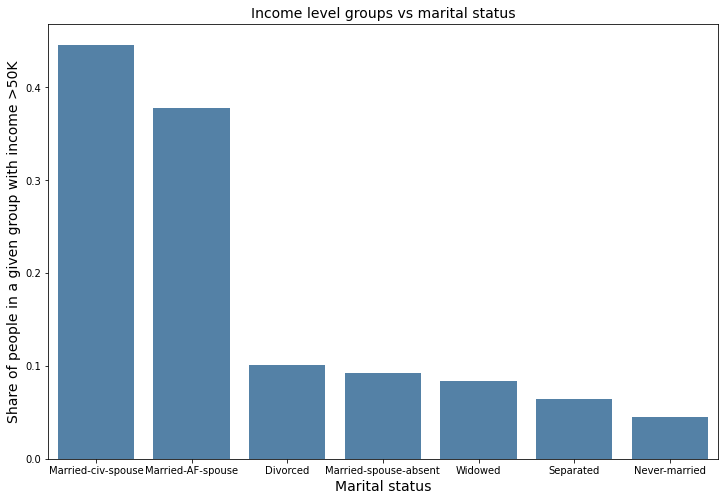

In [237]:
marital_status_plot_data = df.groupby("marital_status")[">50K"].mean().sort_values(ascending = False).reset_index()
plt.figure(figsize = (12, 8))
sns.barplot(data = marital_status_plot_data, x = "marital_status", y = ">50K", color = "steelblue")
plt.title("Income level groups vs marital status", fontsize=14)
plt.xlabel("Marital status", fontsize=14)
plt.ylabel("Share of people in a given group with income >50K", fontsize=14)
plt.show()

Największą szansę na duże zarobki mają teoretycznie osoby w związku małżeńskim, których małżonek nie jest nieobecny. 

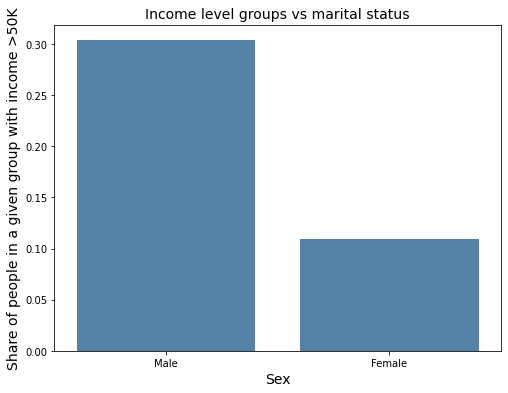

In [241]:
sex_plot_data = df.groupby("sex")[">50K"].mean().sort_values(ascending = False).reset_index()
plt.figure(figsize = (8, 6))
sns.barplot(data = sex_plot_data, x = "sex", y = ">50K", color = "steelblue")
plt.title("Income level groups vs marital status", fontsize=14)
plt.xlabel("Sex", fontsize=14)
plt.ylabel("Share of people in a given group with income >50K", fontsize=14)
plt.show()

Okazuje się, że odsetek mężczyzn zarabiających powyżej 50 tys. jest 3 razy większy niż analogiczny odsetek kobiet. Pokazuje to jak dużym problem w USA był (i wciąż jest) gender pay gap. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df[df.columns.values[:-1]],                   #X
    df[df.columns.values[-1]],                    #y
    test_size=0.33, random_state=42)


In [ ]:
y_test

In [ ]:
#wartosci obliczone po to zeby poźniej znormalizowac zmienne. Podejscei pierwsze gdzie wartosci beda sie rozkładac w
#poblizu zera

mean_age = X_train["age"].mean()
std_age = X_train["age"].std()

mean_fnlwgt = X_train["fnlwgt"].mean()
std_fnlwgt = X_train["fnlwgt"].std()

mean_hours = X_train["hours_per_week"].mean()
std_hours = X_train["hours_per_week"].std()

#drugie podjescie to standaryzjacja, w której mamy wartosci tyko miedzy [0,1]

min_age = X_train["age"].min()
max_age = X_train["age"].max()

min_fnlwgt = X_train["fnlwgt"].min()
max_fnlwgt = X_train["fnlwgt"].max()

min_hours = X_train["hours_per_week"].min()
max_hours = X_train["hours_per_week"].max()


In [ ]:
df['capital_gain'].value_counts()

In [ ]:
df['capital_loss'].value_counts()

W obu przypadkach wystepuje bardzo duzo zer. Zgodnie z sugestia weźmiemy pod uwagę mniejszy dataset, lecz nadal stosuenk zer do wszystkich rekordów posoatnie wysoki. Jesli te dwie kolumny nie beda mialy wplyw na ostaczna predykacje jest szansa ze nie beda wykorzytane :(